# Creating a Geotiff from Scattered Data

See [this blog post](http://geoexamples.blogspot.com/2012/05/creating-grid-from-scattered-data-using.html) for more.

In [3]:
from math import pow
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

def pointValue(x,y,power,smoothing,xv,yv,values):
    nominator=0
    denominator=0
    for i in range(0,len(values)):
        dist = sqrt((x-xv[i])*(x-xv[i])+(y-yv[i])*(y-yv[i])+smoothing*smoothing);
        #If the point is really close to one of the data points, return the data point value to avoid singularities
        if(dist<0.0000000001):
            return values[i]
        nominator=nominator+(values[i]/pow(dist,power))
        denominator=denominator+(1/pow(dist,power))
    #Return NODATA if the denominator is zero
    if denominator > 0:
        value = nominator/denominator
    else:
        value = -9999
    return value

def invDist(xv,yv,values,xsize=100,ysize=100,power=2,smoothing=0):
    valuesGrid = np.zeros((ysize,xsize))
    for x in range(0,xsize):
        for y in range(0,ysize):
            valuesGrid[y][x] = pointValue(x,y,power,smoothing,xv,yv,values)
    return valuesGrid

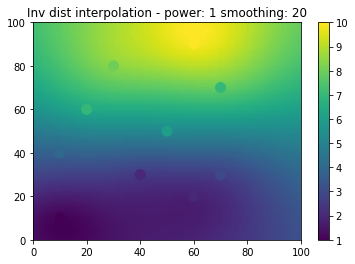

In [7]:
power=1
smoothing=20

#Creating some data, with each coodinate and the values stored in separated lists
xv = [10,60,40,70,10,50,20,70,30,60]
yv = [10,20,30,30,40,50,60,70,80,90]
values = [1,2,2,3,4,6,7,7,8,10]

#Creating the output grid (100x100, in the example)
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

#Creating the interpolation function and populating the output matrix value
ZI = invDist(xv,yv,values,100,100,power,smoothing)


# Plotting the result
n = plt.Normalize(0.0, 100.0)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI)
plt.scatter(xv, yv, 100, values)
plt.title('Inv dist interpolation - power: ' + str(power) + ' smoothing: ' + str(smoothing))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.colorbar()

plt.show()